 # Introduction
 We are using Machine learning technique to determine the chances for getting kidney disease with features like age, bp and so forth.

In [82]:
# Import libraries and classes required for this:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dython.nominal import associations
from pandas.api.types import is_string_dtype   
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [83]:
#import file
df = pd.read_csv('kidney_disease.csv')

# data frame info
print('data shape: ', df.shape)
print(df.columns.tolist())  # to print out all the attributes


data shape:  (400, 26)
['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [85]:
df.head() # to print out top 5 rows of the attributes

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [86]:
# check attribute data types
print(df.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [87]:
# checking unique value in each col
for i in df.columns:
    print(f'{i.upper()} ------------------ \n{df[i].unique()}')
    print()

ID ------------------ 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

In [88]:
# eliminating the blank space in each cell
probColumns1 = ['rc','dm','cad','pcv','wc','classification']

for i in probColumns1:
    df[i] = df[i].str.replace('\t','')

df['dm'] = df['dm'].str.replace(' yes','yes')


In [89]:
# replacing the question mark with mean value
probColumns2 = ['rc','dm','cad','pcv','wc']

for i in probColumns2:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

In [90]:
# forward filling the na value 
df = df.fillna(method="ffill",limit=1)

# replace the na value with mean
for i in df.columns:
#     if is_string_dtype(i):
#         df_clean = df.fillna(df.mean())
#     else:
        df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [91]:
# checking null value
df_clean.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [92]:
# getting the categorical columns
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))


['htn',
 'pcc',
 'dm',
 'pe',
 'rbc',
 'classification',
 'wc',
 'ane',
 'rc',
 'pcv',
 'appet',
 'ba',
 'cad',
 'pc']

In [93]:
# label encoding the categorical data
lab = LabelEncoder()
catColumns = ['appet','ba','pc','ane','pe','cad','rbc','dm','pcc','htn','classification']

for i in catColumns:
    df_clean[i]= lab.fit_transform(df_clean[i])

# converting the column to float type
df_clean['pcv']=df_clean['pcv'].astype(float)
df_clean['wc']=df_clean['wc'].astype(float)
df_clean['rc']=df_clean['rc'].astype(float)


In [94]:
# check again the data
print(df_clean.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object


# Data visualisation

In [95]:
# grouping based on classification with  mean value of each category
df_clean.groupby('classification').mean()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,,,,,,,,,,,,
0,124.5,54.608000,79.16,1.014060,1.684,0.708,0.716,0.64,0.168,0.088,...,10.762400,33.127076,9121.248980,4.25083,0.588,0.548,0.136,0.328,0.304,0.24
1,324.5,46.526667,71.40,1.022433,0.000,0.000,1.000,1.00,0.000,0.000,...,15.183333,46.326667,7712.666667,5.37200,0.000,0.000,0.000,0.000,0.000,0.00


In [96]:
import seaborn as sns
from matplotlib import pyplot as plt

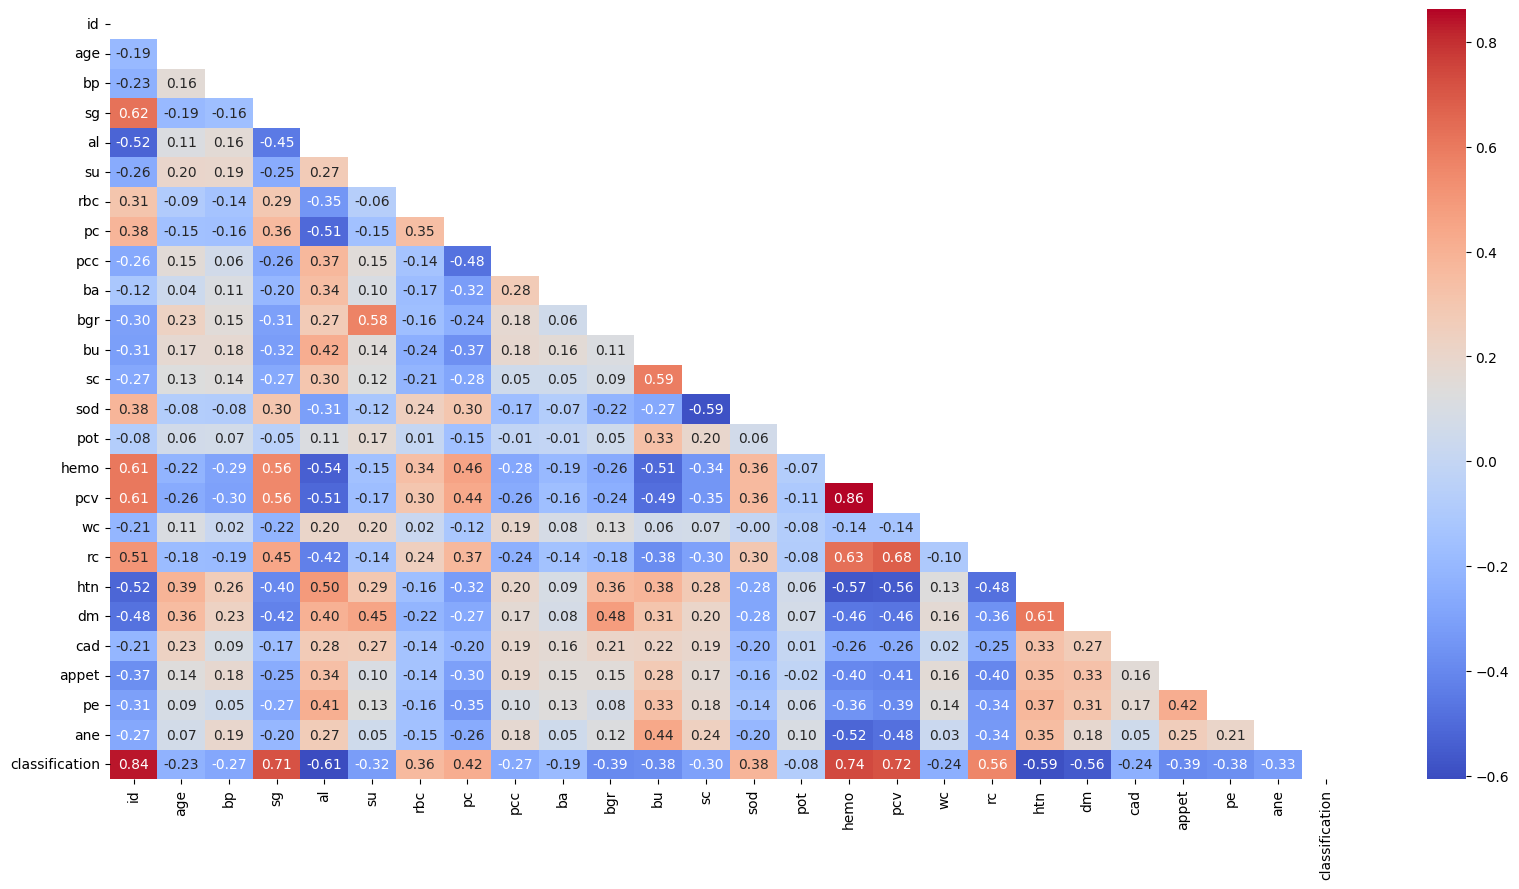

In [97]:
# generating heatmap triangle correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_clean.corr(),annot=True,fmt='.2f',cmap='coolwarm',mask=np.triu(df_clean.corr()))
plt.savefig('kidney_dataset_heatmap.png')

In [98]:
# remove the outliers using z score
df_numerical = df_clean.select_dtypes(exclude='object')
df_clean = df_clean[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]

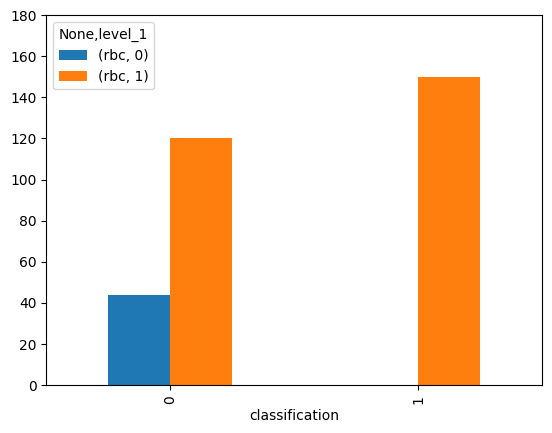

In [99]:
# total of rbc & classification 
pd.DataFrame(df_clean.groupby('classification')['rbc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

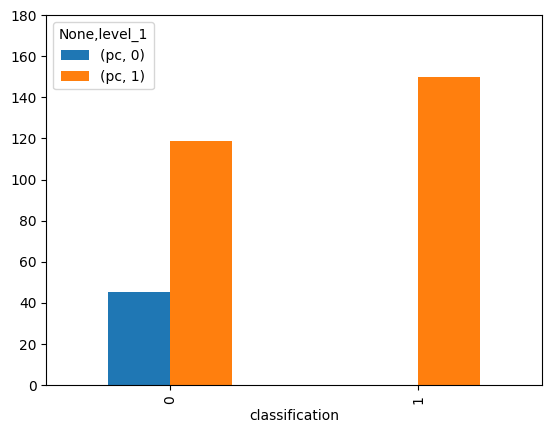

In [100]:
# total of pc & classification 
pd.DataFrame(df_clean.groupby('classification')['pc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

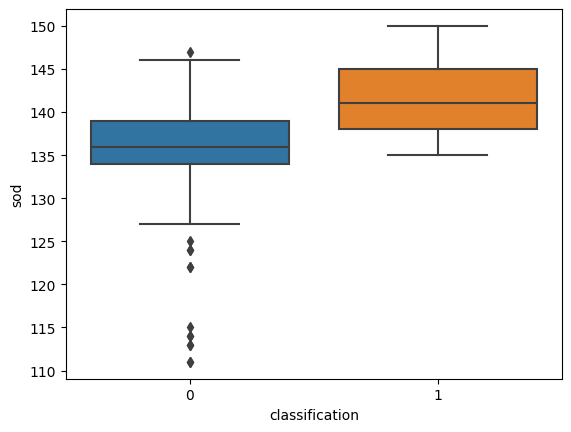

In [101]:
# sod vs classification
sns.boxplot(
    data=df_clean, x="classification", y="sod")
plt.show()

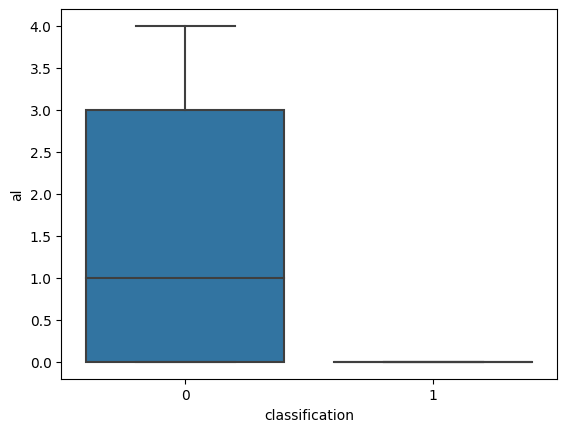

In [102]:
# al vs classification
sns.boxplot(
    data=df_clean, x="classification", y="al")

plt.show()

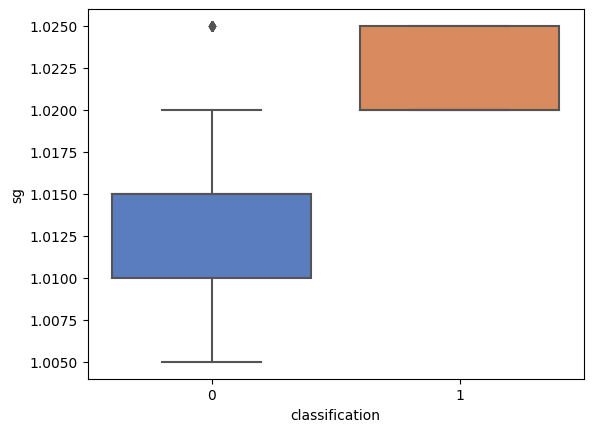

In [103]:
# sg & classification 
sns.boxplot(data=df_clean,
            x="classification",
            y="sg",
            palette = "muted"
           )
plt.show()


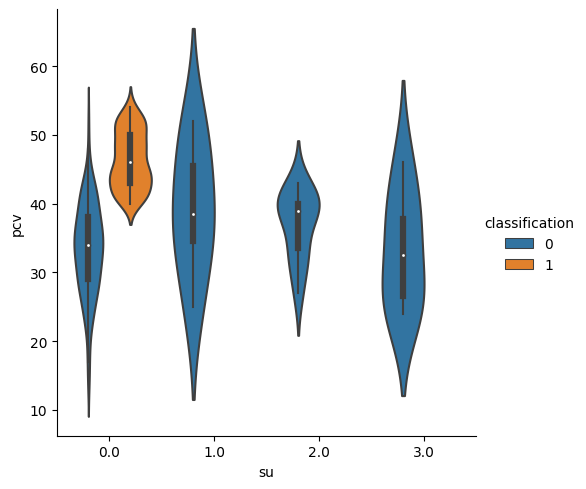

In [104]:
# su, pcv & classification 
sns.catplot(data=df_clean, kind="violin", x="su", y="pcv", hue="classification")
plt.show()


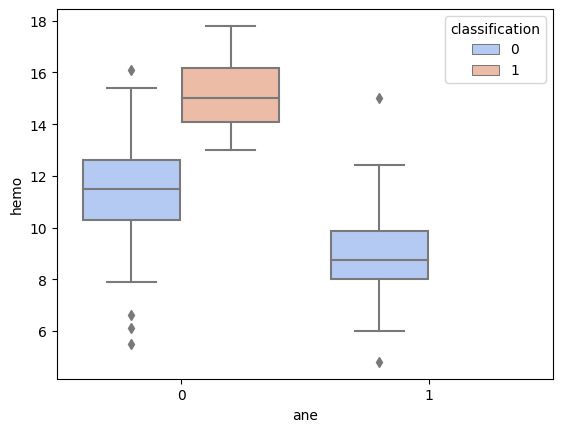

In [105]:
# hemo, ane & classification
sns.boxplot(x="ane", y="hemo", hue="classification",data=df_clean, palette="coolwarm")
plt.show()


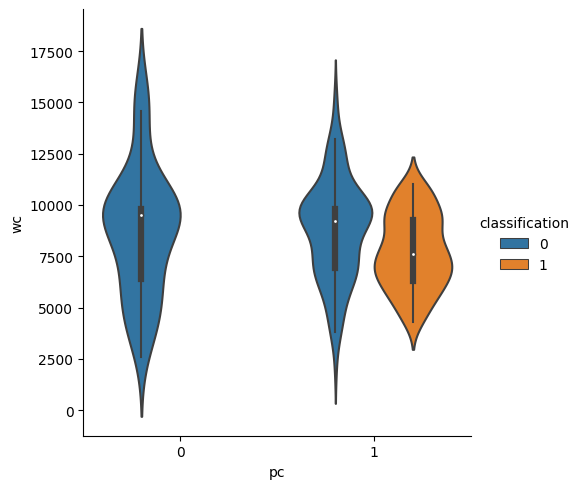

In [106]:
# pc, wc & classification
sns.catplot(data=df_clean, kind="violin", x="pc", y="wc", hue="classification")
plt.show()

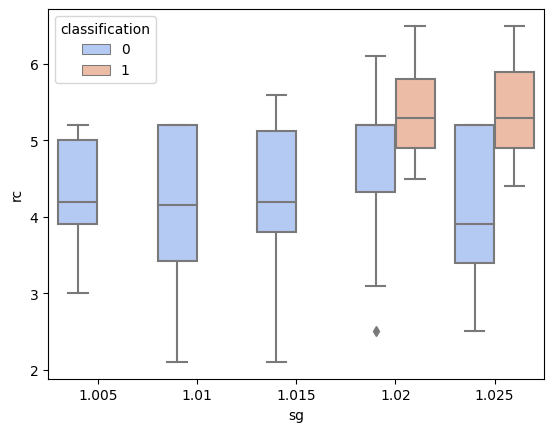

In [107]:
# sg, rc & classification
sns.boxplot(x="sg", y="rc",hue = 'classification',data=df_clean, palette="coolwarm")
plt.show()

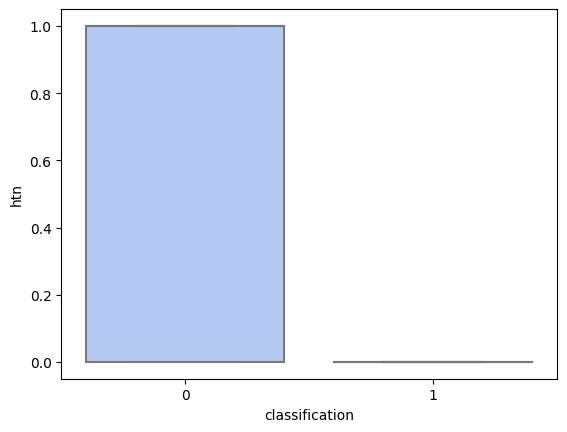

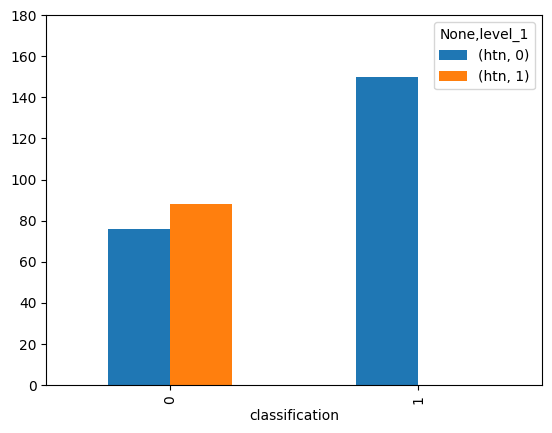

In [108]:
# htn & classification
sns.boxplot(x="classification", y="htn",data=df_clean, palette="coolwarm")
plt.show()

# total of htn & classification
pd.DataFrame(df_clean.groupby('classification')['htn'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

In [125]:
# total of dm & classification
dmdf =pd.DataFrame(df_clean.groupby('classification')['dm'].apply(lambda x: x.value_counts())).reset_index(drop=True)
dmdf

,dm
0,84
1,80
2,150


****Feature Selection
We select the 

In [127]:
df_final =  df_clean.drop(['age','bp','su','pcc','ba','bgr','bu','sc','pot','wc','cad','appet','pe','ane','rbc', 'pc', 'sod',], axis=1)

In [128]:
print(df_final.columns)
print(df_final.shape)

Index(['id', 'sg', 'al', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'classification'], dtype='object')
(314, 9)


# Splitting training & test data 

In [129]:
from sklearn.model_selection import train_test_split


In [130]:
# Split dataset into random train and test subsets:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(314, 8) (314,)
[[ 25.      1.025   0.      9.9    29.      3.7     1.      1.   ]
 [347.      1.025   0.     17.8    43.      5.5     0.      0.   ]
 [398.      1.025   0.     14.2    51.      5.9     0.      0.   ]
 [172.      1.01    1.     10.6    34.      4.9     0.      0.   ]
 [208.      1.01    0.     12.3    41.      4.9     1.      1.   ]]
[0 1 1 0 0]


# Model Training and Evaluation

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


In [132]:
# checking model accuracy, mae, rme, rmse, and generate classification report 
def prediction_plot(model,X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    df_ans = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(df_ans)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

In [133]:
# confusion matrix plot
def conf(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs',  color='black')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    # ax.set_ylim(9.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()


KNN

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        1          1
..     ...        ...
58       0          0
59       1          1
60       0          0
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        29

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



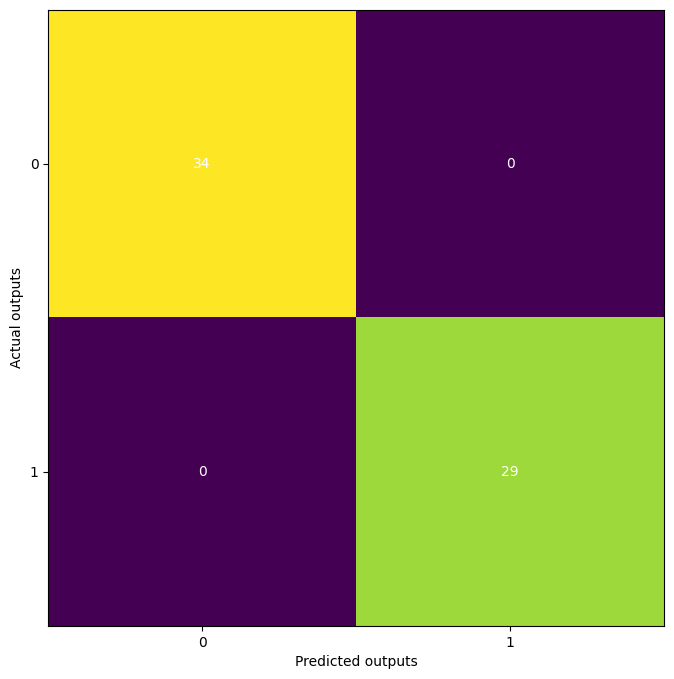

In [134]:
# fit the model
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)


Logistic Regression

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        1          1
..     ...        ...
58       0          0
59       1          1
60       0          0
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        29

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



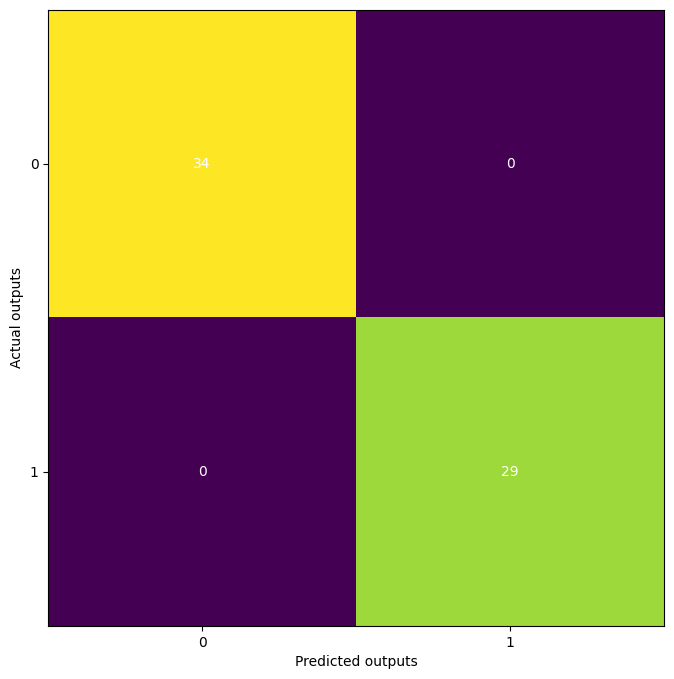

In [135]:
#Logistic Regression
model= LogisticRegression(random_state=0, max_iter= 1000)  
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

Decision Tree

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        1          1
..     ...        ...
58       0          0
59       1          1
60       0          0
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        29

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



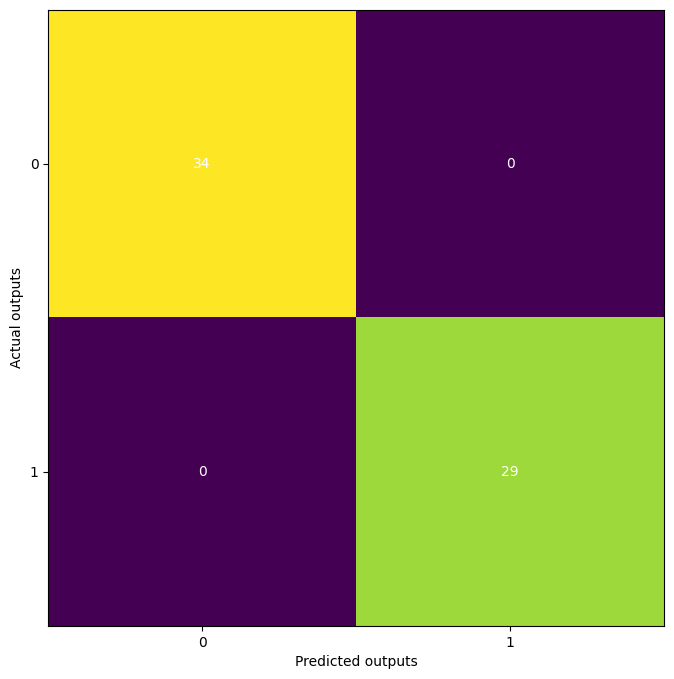

In [136]:
#Decision Tree
model= DecisionTreeClassifier(random_state=0)  
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

Bagging classifier ensemble learning

c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        1          1
..     ...        ...
58       0          0
59       1          1
60       0          0
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        29

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



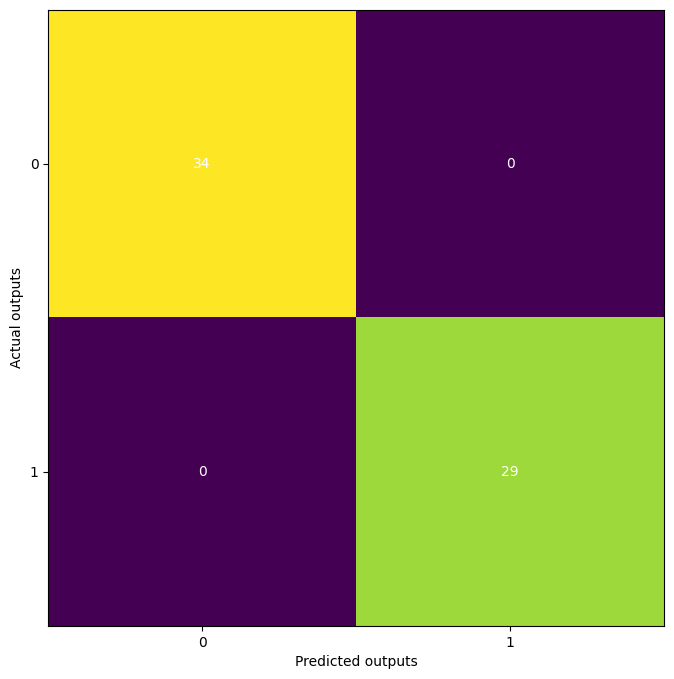

In [137]:
# bagging classifier 
# ensemble learning with decision tree
# no. of base classifier
num_trees = 100
base_cls = DecisionTreeClassifier()
seed = 8
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

In [138]:
# learning with n estimator
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

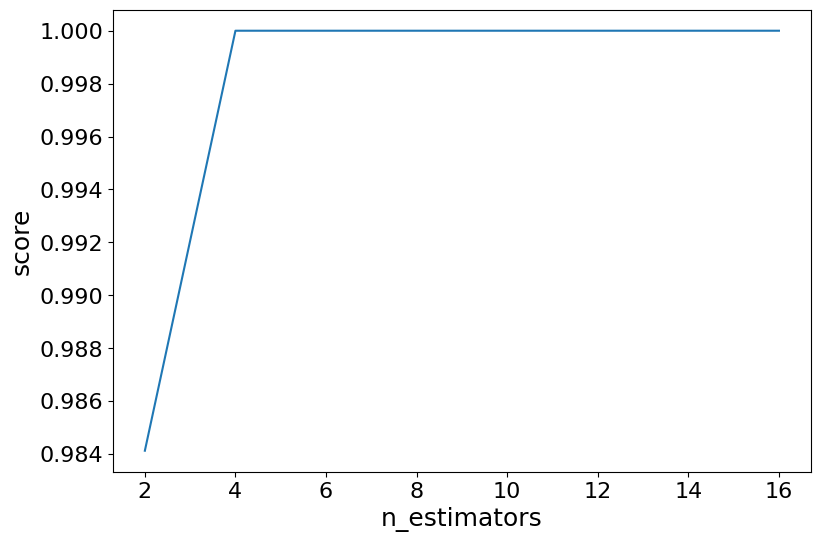

In [139]:
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

save models

In [140]:
from joblib import dump, load


# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)



['finalized_model.sav']

In [141]:
# features to be passed in the model
features = ['sg','al','hemo','pcv','rc','htn','dm','pc','wc','rbc','sod','classification']
df[features].head()

,sg,al,hemo,pcv,rc,htn,dm,pc,wc,rbc,sod,classification
0,1.020,1.0,15.4,44,5.2,yes,yes,normal,7800,NaN,NaN,ckd
1,1.020,4.0,11.3,38,5.2,no,no,normal,6000,NaN,NaN,ckd
2,1.010,2.0,9.6,31,NaN,no,yes,normal,7500,normal,NaN,ckd
3,1.005,4.0,11.2,32,3.9,yes,no,abnormal,6700,normal,111.0,ckd
4,1.010,2.0,11.6,35,4.6,no,no,normal,7300,normal,111.0,ckd
